In [1]:
print('hello world')

hello world


In [1]:
## Importing all the ncessary libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import torch 

In [2]:
## gettting the dataset
df_course = pd.read_csv('online_course_engagement_data.csv', header=0)


In [3]:

df_course.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [4]:
# checking for Nan values 
nanvals = df_course.isna().sum()

In [5]:
# different course names
course_no = df_course['CourseCategory']
courses = df_course['CourseCategory'].unique()

In [6]:
course_no, courses

(0            Health
 1              Arts
 2              Arts
 3           Science
 4       Programming
            ...     
 8995         Health
 8996        Science
 8997         Health
 8998         Health
 8999         Health
 Name: CourseCategory, Length: 9000, dtype: object,
 array(['Health', 'Arts', 'Science', 'Programming', 'Business'],
       dtype=object))

(array([1821.,    0., 1718.,    0.,    0., 1814.,    0., 1810.,    0.,
        1837.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

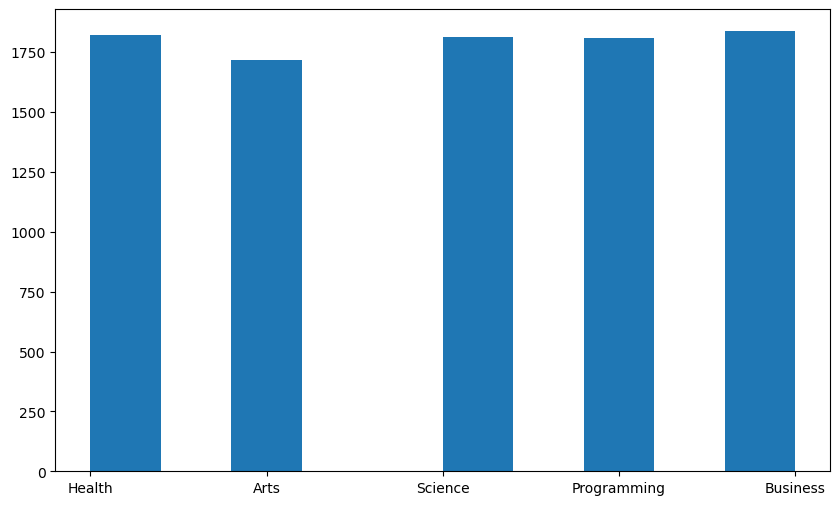

In [7]:
## plotting as an histogram
plt.figure(figsize=(10, 6))
plt.hist(course_no)

In [8]:
## creating a dict to convert course names to course codes
 
c_dict = {
    'Health': 1,
    'Arts': 2,
    'Science': 3,
    'Programming':4,
    'Business': 5
}



In [9]:
## maping the dictionary to the values
df_course['Course_id'] = df_course['CourseCategory'].map(c_dict)

In [10]:
df_course[:5]

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,Course_id
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0,1
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0,2
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1,2
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1,3
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0,4


In [11]:
## rearrannging columns
col = df_course.pop('Course_id') 
df_course.insert(2, 'Course_id', col)

In [12]:
df_course

,UserID,CourseCategory,Course_id,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,1,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,2,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,2,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,3,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,4,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...,...
8995,8757,Health,1,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,3,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,1,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,1,70.048665,13,10,79.655182,72.975225,1,1


In [13]:
# creating the x and y variable

X_row = df_course[['Course_id','TimeSpentOnCourse','NumberOfVideosWatched','NumberOfQuizzesTaken','QuizScores','CompletionRate','DeviceType']]

y_row = df_course[['CourseCompletion']]

In [14]:
## converting them to numpy arrays
X_array = X_row.to_numpy()
y_array = y_row.to_numpy()

In [15]:
# converting to tensor
X_course = torch.from_numpy(X_array).type(torch.float)
y_course = torch.from_numpy(y_array).type(torch.float)



In [16]:
X_course.size(), y_course.size()

(torch.Size([9000, 7]), torch.Size([9000, 1]))

In [17]:
from sklearn.model_selection import train_test_split

X_course_train, X_course_test, y_course_train, y_course_test = train_test_split(X_course,y_course,
                                                                                test_size= 0.2)

In [18]:
len(X_course_train),len(X_course_test), len(y_course_train), len(y_course_test)

(7200, 1800, 7200, 1800)

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [20]:
from torch import nn

class CourseComp(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features= 7, out_features= 21)
        self.layer2 = nn.Linear(in_features= 21, out_features= 21)
        self.layer3 = nn.Linear(in_features=21, out_features=21)
        self.layer4 = nn.Linear(in_features= 21, out_features=21)
        self.layer5 = nn.Linear(in_features= 21, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))))

model_0 = CourseComp()



In [21]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-2.2757e-01, -1.5209e-01,  4.7703e-02, -2.5512e-01, -3.7636e-01,
                       -3.6836e-01, -3.2835e-01],
                      [ 3.4211e-01,  4.1544e-02,  2.4975e-01,  3.2172e-01,  3.4737e-01,
                        4.8252e-02, -2.4604e-01],
                      [ 2.7532e-01, -1.2266e-01,  9.3244e-03,  2.3997e-01, -1.4436e-01,
                        5.5990e-02, -1.0362e-01],
                      [ 5.9656e-02,  2.9270e-01, -3.5962e-02,  1.9832e-01,  1.1663e-01,
                       -1.4610e-01, -8.8075e-02],
                      [ 3.1271e-01, -1.6324e-01, -9.7296e-02, -7.3685e-02, -3.2474e-01,
                        1.5205e-01, -3.5694e-01],
                      [-1.7527e-01,  8.2349e-02, -9.8174e-02, -2.4061e-01,  3.5086e-01,
                        4.2272e-02,  3.1846e-01],
                      [-8.9689e-02,  2.4297e-01,  1.4388e-01, -2.9163e-02, -3.4660e-01,
                       -1.8337e-02,  2.2407e-01],
   

In [22]:
# loss function 
loss_fn = nn.BCEWithLogitsLoss()

# optimiser function
optimiser = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01)


In [23]:
# accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct/len(y_pred) * 100
    return acc 


In [24]:
with torch.inference_mode():
    y_logits = model_0(X_course_test[:5])
y_logits

tensor([[-1.4310],
        [-1.2062],
        [-1.3000],
        [-1.3567],
        [-1.4431]])

In [25]:
# to convert the logits to probabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_probs = torch.sigmoid(y_logits).round()




In [26]:
y_pred_probs, y_pred_prob

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([[0.1929],
         [0.2304],
         [0.2142],
         [0.2048],
         [0.1911]]))

In [27]:
accuracy_fn(y_course_train[:5],y_pred_probs)

60.0

In [28]:
y_course_train[:5]

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.]])

In [29]:
from tqdm import tqdm

In [30]:
X_course_train.shape

torch.Size([7200, 7])

In [41]:
#creating the training loop 

epochs = 5000

for epoch in tqdm(range(epochs)):
    # getting the output from the model, the forward function
    y_logits = model_0(X_course_train)
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculating the loss 
    loss = loss_fn(y_logits,y_course_train)
    acc = accuracy_fn(y_true= y_course_train,
                      y_pred= y_pred)

    # setting the optimiser to zero
    optimiser.zero_grad()

    # applying th loss

    loss.backward()

    # optimising
    optimiser.step()

    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_course_test)
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_course_test)
      test_acc = accuracy_fn(y_true=y_course_test,
                             y_pred=test_pred)
    if epoch % 1000 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





  0%|          | 12/5000 [00:00<01:34, 52.62it/s]

Epoch: 0 | Loss: 0.27762, Accuracy: 89.56% | Test loss: 0.30896, Test acc: 87.44%


 20%|██        | 1021/5000 [00:09<00:34, 116.20it/s]

Epoch: 1000 | Loss: 0.28600, Accuracy: 88.89% | Test loss: 0.31683, Test acc: 86.61%


 40%|████      | 2023/5000 [00:16<00:22, 131.31it/s]

Epoch: 2000 | Loss: 0.26239, Accuracy: 90.69% | Test loss: 0.29999, Test acc: 88.83%


 60%|██████    | 3019/5000 [00:24<00:14, 135.75it/s]

Epoch: 3000 | Loss: 0.28435, Accuracy: 88.76% | Test loss: 0.31924, Test acc: 86.78%


 81%|████████  | 4030/5000 [00:31<00:06, 142.90it/s]

Epoch: 4000 | Loss: 0.25666, Accuracy: 91.36% | Test loss: 0.29392, Test acc: 89.56%


100%|██████████| 5000/5000 [00:39<00:00, 125.69it/s]


In [42]:
y = model_0(X_course_test[:50])

In [43]:
ypre = torch.round(torch.sigmoid(y))

In [44]:
ypre, y_course_test[:20]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], grad_fn=<RoundBackward0>),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.

In [45]:
torch.eq(ypre,y_course_test[:50]).sum()

tensor(42)

In [46]:
torch.eq(ypre,y_course_test[:50]).sum()/50

tensor(0.8400)

In [47]:
#saving the model
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents= True, exist_ok= True)

MODEL_NAME = "course_completion_prediction_model_0.pth"
MODEL_SAVE_PATH = model_path / MODEL_NAME

In [48]:
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

In [49]:
loaded_model_0 = CourseComp()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [50]:
loaded_model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-2.2757e-01, -1.5209e-01,  4.7703e-02, -2.5512e-01, -3.7636e-01,
                       -3.6836e-01, -3.2835e-01],
                      [ 6.6830e-03, -2.2669e-01,  9.3980e-01,  4.5961e-01,  4.0215e-01,
                       -7.6549e-02, -3.4766e-01],
                      [ 2.7516e-01, -1.2290e-01,  8.9792e-03,  2.3954e-01, -1.4666e-01,
                        5.1886e-02, -1.0366e-01],
                      [-3.2119e-01,  2.1898e-01,  7.2625e-01,  5.2582e-01,  8.0807e-02,
                        1.4729e-01, -1.6849e-01],
                      [ 3.1271e-01, -1.6324e-01, -9.7296e-02, -7.3685e-02, -3.2474e-01,
                        1.5205e-01, -3.5694e-01],
                      [-2.5597e-01, -8.5676e-02, -6.0281e-01, -2.4521e-01,  5.2638e-01,
                       -1.9588e-01,  2.1613e-01],
                      [ 4.0039e-03,  4.1566e-01,  3.2535e-01, -7.8056e-02, -5.8637e-01,
                        7.7038e-02,  2.3242e-01],
   